<a href="https://colab.research.google.com/github/ayushabhinav/TechGig/blob/main/NewYearResolution_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
! ls -lrt /drive/MyDrive/NewYearResolutionDataset

total 1294
-rw------- 1 root root  33779 Feb 28 14:22 test.csv
-rw------- 1 root root  46862 Feb 28 14:22 train.csv
-rw------- 1 root root   2828 Feb 28 14:23 sample-submission.csv
-rw------- 1 root root 804552 Jun 24 08:42 NewYearResolution.ipynb
-rw------- 1 root root   3575 Jun 24 08:42 my_sub.csv
-rw------- 1 root root 432073 Jun 29 09:54 NewYearResolution_NN.ipynb


In [3]:
import os
import pandas as pd
import numpy as np
from typing import List
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
base_dir = '/drive/MyDrive/NewYearResolutionDataset'
train_file = os.path.join(base_dir, 'train.csv')
test_file = os.path.join(base_dir, 'test.csv')

In [5]:
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

#### EDA on train data

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   outlet_no               344 non-null    int64  
 1   business_type           344 non-null    int64  
 2   city                    344 non-null    object 
 3   state                   344 non-null    object 
 4   zip                     344 non-null    int64  
 5   store_location          344 non-null    object 
 6   avg_age                 344 non-null    float64
 7   blue_collar             344 non-null    float64
 8   white_collar            344 non-null    float64
 9   female                  344 non-null    float64
 10  male                    344 non-null    float64
 11  total_household_size    344 non-null    float64
 12  total_household_income  344 non-null    int64  
 13  time_zone               344 non-null    object 
 14  latitude                344 non-null    fl

In [7]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
outlet_no,344.0,5.510494e+02,1.747093e+02,2.470000e+02,4.075000e+02,5.505000e+02,7.007500e+02,8.450000e+02
business_type,344.0,1.279070e+00,8.726644e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
zip,344.0,5.232469e+04,2.534889e+04,1.003200e+04,3.363250e+04,4.684500e+04,7.716500e+04,9.837000e+04
avg_age,344.0,4.016640e+01,8.735648e+00,1.967000e+01,3.462000e+01,3.917000e+01,4.402750e+01,8.012000e+01
blue_collar,344.0,3.825093e+01,1.667214e+01,0.000000e+00,2.557500e+01,3.748000e+01,4.916250e+01,7.864000e+01
white_collar,344.0,3.926945e+01,1.242370e+01,0.000000e+00,3.101750e+01,3.860500e+01,4.636750e+01,1.000000e+02
female,344.0,5.242904e+01,6.056760e+00,2.000000e-01,5.064250e+01,5.248000e+01,5.452000e+01,7.092000e+01
male,344.0,4.757102e+01,6.056753e+00,2.908000e+01,4.548000e+01,4.752000e+01,4.935750e+01,9.980000e+01
total_household_size,344.0,2.286715e+00,5.505952e-01,0.000000e+00,1.930000e+00,2.270000e+00,2.570000e+00,4.080000e+00
total_household_income,344.0,6.209274e+07,3.023098e+07,1.605400e+07,4.072800e+07,5.516400e+07,7.542600e+07,2.218590e+08


- no null value in data

<Axes: xlabel='total_sales'>

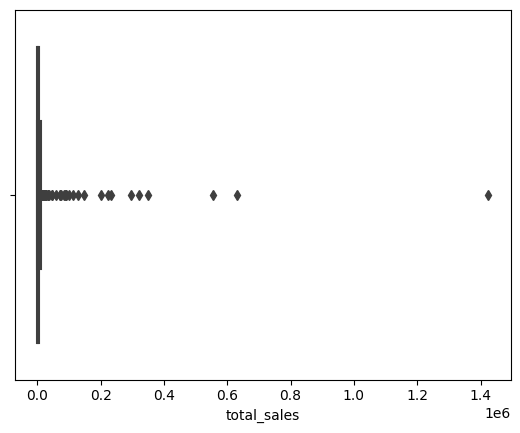

In [8]:
sns.boxplot(data=train_data, x='total_sales')

- there is outlier in total_sales

<ipython-input-9-90a111d1cbda>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr() * 100 , cmap="PiYG", annot=True)


<Axes: >

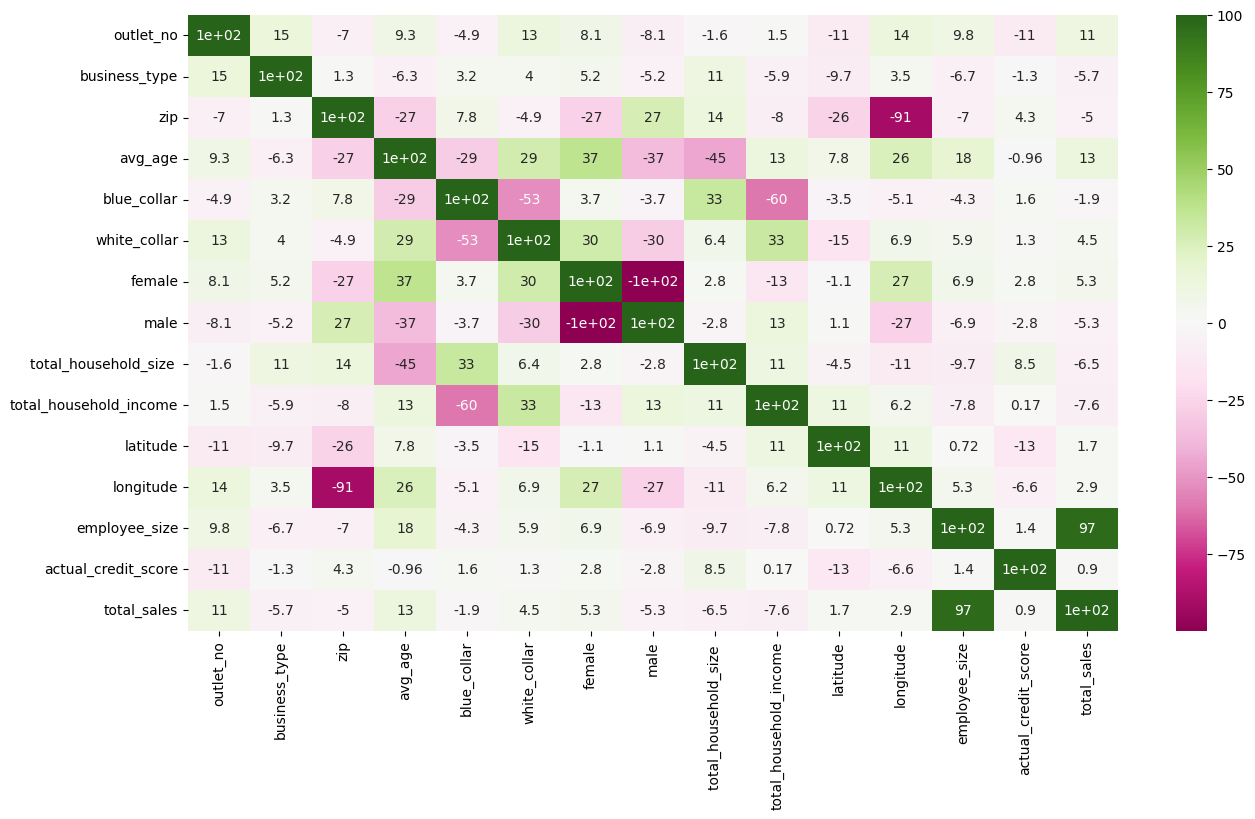

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr() * 100 , cmap="PiYG", annot=True)


- employee size and total_salea are highy correlated.
- male X female, white collar X blue collar are higly correlated
- blue-collar X household income
- age X household, male, female, white, blue collar
- zip X latitudes, longitudes, male, female, age

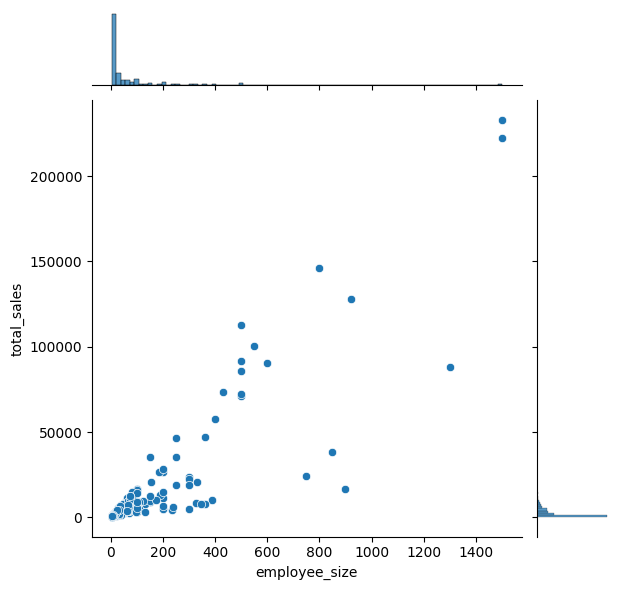

In [10]:
sns.jointplot(data=train_data[train_data.employee_size<2000], x='employee_size', y='total_sales')

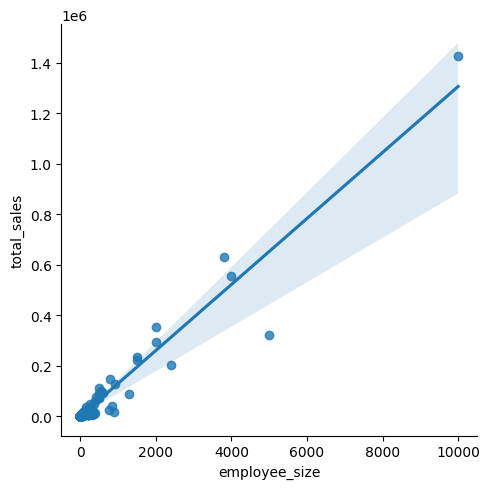

In [11]:
sns.lmplot(data=train_data, x='employee_size', y='total_sales')

In [12]:
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

<Axes: >

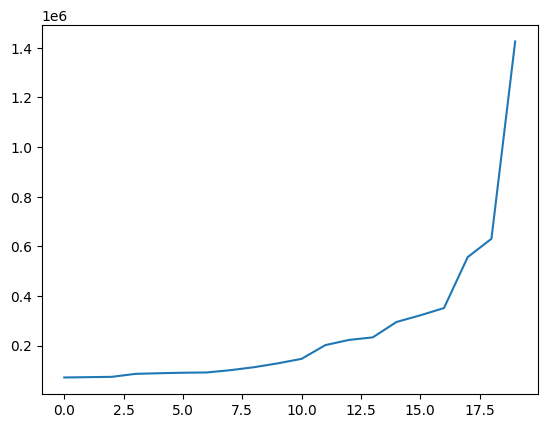

In [13]:
sns.lineplot(train_data.total_sales.sort_values()[-20:].to_list())
# this is to check the slo of the line when we connect the values in ascending order

In [14]:
filt = train_data.total_sales > 0.4 * 10**6
train_data[filt]

,outlet_no,business_type,city,state,zip,store_location,avg_age,blue_collar,white_collar,female,...,total_household_income,time_zone,latitude,longitude,location_employee_code,employee_size,credit_score,credit_score_range,actual_credit_score,total_sales
119,841,1,BETHLEHEM,PA,18017,AT-WORK,62.34,31.17,44.72,61.98,...,29932000,EST,40.644637,-75.407893,K,10000,C+,75 TO 79,78,1424392
298,582,1,PHOENIX,AZ,85006,AT-WORK,34.70,78.36,26.39,46.62,...,24886000,MST,33.465674,-112.058792,I,3800,A+,95 TO 100,100,629829
304,621,1,FORT WAYNE,IN,46845,AT-WORK,35.05,20.72,51.14,50.00,...,81782000,EST,41.180940,-85.101941,I,4000,B+,85 TO 89,88,556016


In [15]:
train_data = train_data[~filt]
train_data.shape

(341, 22)

In [16]:
# X = np.array(train_data.employee_size).reshape(-1,1)
# y = np.array(train_data.total_sales).reshape(-1,1)

train_X = train_data.iloc[:, :len(train_data.columns.to_list())-2]
train_y = train_data.iloc[:, len(train_data.columns.to_list())-1]

In [17]:
train_X.columns = [i.strip() for i in train_X.columns]
train_X.columns

Index(['outlet_no', 'business_type', 'city', 'state', 'zip', 'store_location',
       'avg_age', 'blue_collar', 'white_collar', 'female', 'male',
       'total_household_size', 'total_household_income', 'time_zone',
       'latitude', 'longitude', 'location_employee_code', 'employee_size',
       'credit_score', 'credit_score_range'],
      dtype='object')

In [18]:
np.std(train_y)
# standard deviation in y

39810.39618132019

In [19]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from ast import literal_eval

In [20]:
class ColumnSelector(BaseEstimator, TransformerMixin):
  def __init__(self, col_name:List[str]):
    self.col_name = col_name

  def fit(self, X, y=None):
    return self

  def transform(self, X, y=None):
    return X.loc[:,self.col_name]

In [21]:
def preprocess_pipeline_builder(columns_name:List[str], num_col_idx:List[int], cat_col_idx:List[int]):

  col_preprocessor = ColumnTransformer(
                    transformers = [
                        ('scaler', StandardScaler(), num_col_idx),
                        ('onehot_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_col_idx)
                    ]
                )


  p = Pipeline( steps= [
                        ( 'column_selector' , ColumnTransformer([('column_selector', 'passthrough', columns_name)])),
                        ('col_processor', col_preprocessor)
                        # , ('polyfeature', PolynomialFeatures(2))
                      ]
              )
  return p

In [22]:
def train_model(model, preprocess_fn, X, y, random_state=42):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=random_state)

  X_train = preprocess_fn.fit_transform(X_train)
  X_test = preprocess_fn.transform(X_test)

  model.fit(X_train, y_train)
  score = model.score(X_train, y_train)

  rmse_train = mean_squared_error(y_train, model.predict(X_train)) ** 0.5
  rmse_test = mean_squared_error(y_test, model.predict(X_test)) ** 0.5


  return score, rmse_train, rmse_test



In [23]:
p = preprocess_pipeline_builder(['employee_size', 'business_type'], [0], [1])
p.fit_transform(train_X, train_y).shape

(341, 3)

In [24]:
lr_model = LinearRegression()
train_model(lr_model, p, train_X, train_y)

(0.8885148881944942, 11822.343630816513, 50720.16841381425)

In [25]:
lr_model_report = pd.DataFrame(
    data = [  ['employee_size, business_type, state, store_location, credit_score_range, blue_collar', [0], [1,2,3,4,5]],
              ['employee_size, avg_age, business_type, state, store_location, credit_score_range, blue_collar', [0,1], [2,3,4,5,6]],
              ['employee_size, avg_age, total_household_size, business_type, state, store_location, credit_score_range,blue_collar', [0,1,2], [3,4,5,6,7]],
              ['employee_size, avg_age, total_household_size, total_household_income, business_type, state,store_location, credit_score_range,blue_collar', [0,1,2,3], [4,5,6,7,8]]
           ]

)
lr_model_report


,0,1,2
0,"employee_size, business_type, state, store_loc...",[0],"[1, 2, 3, 4, 5]"
1,"employee_size, avg_age, business_type, state, ...","[0, 1]","[2, 3, 4, 5, 6]"
2,"employee_size, avg_age, total_household_size, ...","[0, 1, 2]","[3, 4, 5, 6, 7]"
3,"employee_size, avg_age, total_household_size, ...","[0, 1, 2, 3]","[4, 5, 6, 7, 8]"


In [26]:
lr_model_report[['r2', 'train_rmse', 'test_rmse']]= lr_model_report.apply(lambda x: train_model( lr_model,
                                            preprocess_pipeline_builder([i.strip() for i in x[0].split(',')], x[1], x[2]),
                                             train_X,
                                             train_y
                                            ),
                      axis=1,
                      result_type='expand'
                    )
lr_model_report

,0,1,2,r2,train_rmse,test_rmse
0,"employee_size, business_type, state, store_loc...",[0],"[1, 2, 3, 4, 5]",0.994519,2621.371806,2.426356e+15
1,"employee_size, avg_age, business_type, state, ...","[0, 1]","[2, 3, 4, 5, 6]",0.997441,1791.284527,5.155260e+14
2,"employee_size, avg_age, total_household_size, ...","[0, 1, 2]","[3, 4, 5, 6, 7]",0.997543,1755.101447,1.620011e+16
3,"employee_size, avg_age, total_household_size, ...","[0, 1, 2, 3]","[4, 5, 6, 7, 8]",0.997551,1752.277405,1.363154e+16


In [27]:
from sklearn.linear_model import Lasso, Ridge

In [28]:
lasso = Lasso(alpha=10000)
lr_model_report[['Lasso r2', 'Lasso_train_rmse', 'Lasso_test_rmse']]= lr_model_report.apply(lambda x: train_model( lasso,
                                            preprocess_pipeline_builder([i.strip() for i in x[0].split(',')], x[1], x[2]),
                                             train_X,
                                             train_y
                                            ),
                      axis=1,
                      result_type='expand'
                    )
lr_model_report

,0,1,2,r2,train_rmse,test_rmse,Lasso r2,Lasso_train_rmse,Lasso_test_rmse
0,"employee_size, business_type, state, store_loc...",[0],"[1, 2, 3, 4, 5]",0.994519,2621.371806,2.426356e+15,0.808295,15502.849032,26485.353711
1,"employee_size, avg_age, business_type, state, ...","[0, 1]","[2, 3, 4, 5, 6]",0.997441,1791.284527,5.155260e+14,0.808295,15502.849032,26485.353711
2,"employee_size, avg_age, total_household_size, ...","[0, 1, 2]","[3, 4, 5, 6, 7]",0.997543,1755.101447,1.620011e+16,0.808295,15502.849032,26485.353711
3,"employee_size, avg_age, total_household_size, ...","[0, 1, 2, 3]","[4, 5, 6, 7, 8]",0.997551,1752.277405,1.363154e+16,0.808295,15502.849032,26485.353711


In [29]:
ridge = Ridge(alpha=100)
lr_model_report[['Ridge r2', 'Ridge_train_rmse', 'Ridge_test_rmse']]= lr_model_report.apply(lambda x: train_model( ridge,
                                            preprocess_pipeline_builder([i.strip() for i in x[0].split(',')], x[1], x[2]),
                                             train_X,
                                             train_y
                                            ),
                      axis=1,
                      result_type='expand'
                    )
lr_model_report

,0,1,2,r2,train_rmse,test_rmse,Lasso r2,Lasso_train_rmse,Lasso_test_rmse,Ridge r2,Ridge_train_rmse,Ridge_test_rmse
0,"employee_size, business_type, state, store_loc...",[0],"[1, 2, 3, 4, 5]",0.994519,2621.371806,2.426356e+15,0.808295,15502.849032,26485.353711,0.828898,14646.140392,27988.400591
1,"employee_size, avg_age, business_type, state, ...","[0, 1]","[2, 3, 4, 5, 6]",0.997441,1791.284527,5.155260e+14,0.808295,15502.849032,26485.353711,0.830058,14596.410831,27854.235528
2,"employee_size, avg_age, total_household_size, ...","[0, 1, 2]","[3, 4, 5, 6, 7]",0.997543,1755.101447,1.620011e+16,0.808295,15502.849032,26485.353711,0.830240,14588.578824,27922.727711
3,"employee_size, avg_age, total_household_size, ...","[0, 1, 2, 3]","[4, 5, 6, 7, 8]",0.997551,1752.277405,1.363154e+16,0.808295,15502.849032,26485.353711,0.830222,14589.333917,27928.761232


In [30]:
p = preprocess_pipeline_builder([i.strip() for i in lr_model_report.iloc[3,0].split(',')], lr_model_report.iloc[3,1], lr_model_report.iloc[3,2])

ridge.fit(p.fit_transform(train_X), train_y)

Ridge(alpha=100)

<Axes: ylabel='Count'>

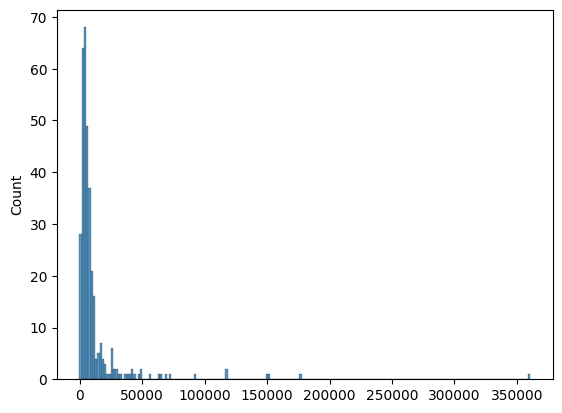

In [31]:
sns.histplot(ridge.predict(p.transform(train_X)))

In [32]:
(ridge.predict(p.transform(train_X))< 0).sum()   # three values are predicted negative.

3

Using DNN

In [120]:
import tensorflow as tf
import keras
from keras.layers import InputLayer, Dense, CategoryEncoding, Input
from keras.activations import elu, relu
from keras.models import Sequential
from keras.losses import MeanSquaredError
from keras.callbacks import EarlyStopping

In [121]:
def get_model(input_shape, units, activation=['relu', 'relu']):
  layers = [Input(shape=input_shape)]
  layers.extend( [Dense(unit, activation=activation[0]) for unit in units[:-1]])
  layers.append(Dense(units[-1], activation=activation[-1]))
  model = Sequential(layers)
  return model

In [131]:
train_pX = p.transform(train_X)

model = get_model(
    input_shape = (train_pX.shape[1],),
    units= [128, 64, 32, 16, 1],
    activation=[ 'relu', 'relu']
)

In [132]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 128)               41856     
                                                                 
 dense_56 (Dense)            (None, 64)                8256      
                                                                 
 dense_57 (Dense)            (None, 32)                2080      
                                                                 
 dense_58 (Dense)            (None, 16)                528       
                                                                 
 dense_59 (Dense)            (None, 1)                 17        
                                                                 
Total params: 52,737
Trainable params: 52,737
Non-trainable params: 0
_________________________________________________________________


In [133]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError() , metrics=['mean_absolute_error'])

In [134]:
early_stopping = EarlyStopping(patience=3,  restore_best_weights=True)
model.fit(train_pX, train_y.astype(np.float32),epochs=1000, validation_split=0.1, callbacks=[early_stopping], verbose=2)

Epoch 1/1000
10/10 - 1s - loss: 1011029760.0000 - mean_absolute_error: 9408.9854 - val_loss: 7981807104.0000 - val_mean_absolute_error: 33698.7617 - 1s/epoch - 135ms/step
Epoch 2/1000
10/10 - 0s - loss: 1010959424.0000 - mean_absolute_error: 9405.8936 - val_loss: 7981321216.0000 - val_mean_absolute_error: 33693.3750 - 83ms/epoch - 8ms/step
Epoch 3/1000
10/10 - 0s - loss: 1010773696.0000 - mean_absolute_error: 9397.7344 - val_loss: 7980346880.0000 - val_mean_absolute_error: 33683.0117 - 82ms/epoch - 8ms/step
Epoch 4/1000
10/10 - 0s - loss: 1010398080.0000 - mean_absolute_error: 9383.8477 - val_loss: 7978330112.0000 - val_mean_absolute_error: 33662.0000 - 83ms/epoch - 8ms/step
Epoch 5/1000
10/10 - 0s - loss: 1009756288.0000 - mean_absolute_error: 9356.3564 - val_loss: 7974961664.0000 - val_mean_absolute_error: 33626.8359 - 92ms/epoch - 9ms/step
Epoch 6/1000
10/10 - 0s - loss: 1008735872.0000 - mean_absolute_error: 9313.8447 - val_loss: 7970394624.0000 - val_mean_absolute_error: 33577.921

In [169]:
from sklearn.metrics import r2_score, mean_squared_error
score = r2_score(train_y, model.predict(train_pX))
rmse = mean_squared_error(train_y, model.predict(train_pX)) ** 0.5

print(score, rmse)

11/11 [==============================] - 0s 2ms/step
0.8104065202314116 17334.37543207589


In [170]:
np.std(train_y)

39810.39618132019

In [171]:
rmse/np.std(train_y)

0.4354233339734889

11/11 [==============================] - 0s 2ms/step


<Axes: ylabel='Count'>

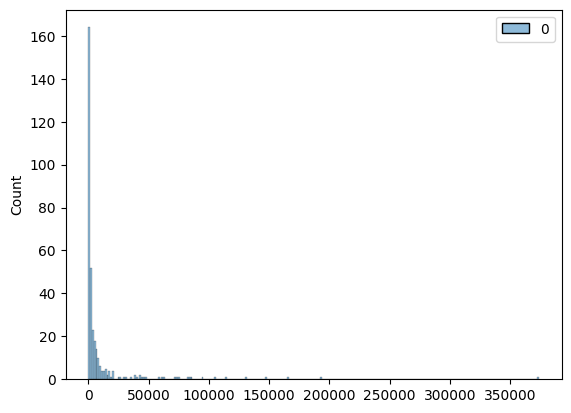

In [137]:
sns.histplot(model.predict(train_pX))

In [ ]:
model.predict(train_pX)

In [140]:
(model.predict(train_pX) < 0 ).sum()

11/11 [==============================] - 0s 2ms/step


0

predicting on submission data

In [145]:
sub_X = test_data.iloc[:, :len(test_data.columns.to_list())]
sub_X.columns = [i.strip() for i in sub_X.columns]
sub_X

,outlet_no,business_type,city,state,zip,store_location,avg_age,blue_collar,white_collar,female,...,total_household_size,total_household_income,time_zone,latitude,longitude,location_employee_code,employee_size,credit_score,credit_score_range,actual _credit_score
0,1001,1,HOUSTON,TX,77057,AT-WORK,33.96,22.42,44.74,50.76,...,1.58,74121000,CST,29.749850,-95.482657,D,41,A+,95 TO 100,95
1,1002,1,RAPID CITY,SD,57702,AT-WORK,37.34,42.41,34.52,50.06,...,1.99,45196000,MST,44.079441,-103.262005,A,4,A+,95 TO 100,96
2,1003,1,CLARKSVILLE,AR,72830,AT-WORK,36.06,54.47,33.87,50.46,...,2.58,47034000,CST,35.482303,-93.476899,A,4,A+,95 TO 100,96
3,1004,1,RAPID CITY,SD,57702,THIRD PARTY (NON-CONSUMER),37.34,42.41,34.52,50.06,...,1.99,45196000,MST,44.082562,-103.263440,B,5,B+,85 TO 89,89
4,1005,1,CLARKSVILLE,AR,72830,ENTERTAINMENT/RECREATION/LEISURE,33.64,50.70,34.93,51.30,...,2.56,45592000,CST,35.472011,-93.482870,B,5,A+,95 TO 100,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,1251,4,CLEVELAND HTS,OH,44118,EDUCATIONAL,36.51,4.27,55.69,51.53,...,2.89,221859000,EST,41.486555,-81.525715,H,600,A,90 TO 94,91
251,1252,1,BETHLEHEM,PA,18017,TRAVEL/TRANSPORTATION/HOSPITALITY,55.23,11.83,45.25,55.66,...,2.15,97928000,EST,40.644006,-75.369886,G,250,A,90 TO 94,94
252,1253,4,BETHLEHEM,PA,18017,THIRD PARTY (NON-CONSUMER),62.34,31.17,44.72,61.98,...,1.33,29932000,EST,40.647520,-75.408263,A,3,B+,85 TO 89,86
253,1254,1,BETHLEHEM,PA,18017,AT-WORK,42.37,15.81,52.49,52.73,...,2.53,107371000,EST,40.673970,-75.383771,A,3,A,90 TO 94,90


In [147]:
sub_pX= p.transform(sub_X)
sub_pX

array([[-0.19280017, -0.71200804, -1.28924348, ...,  0.        ,
         0.        ,  0.        ],
       [-0.29065052, -0.32211345, -0.54132177, ...,  0.        ,
         0.        ,  0.        ],
       [-0.29065052, -0.46976584,  0.5349558 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.29329513,  2.56172224, -1.7452933 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.29329513,  0.25811429,  0.44374584, ...,  0.        ,
         0.        ,  0.        ],
       [-0.22982463,  0.00433675,  0.75385971, ...,  0.        ,
         0.        ,  0.        ]])

8/8 [==============================] - 0s 5ms/step


<Axes: ylabel='Count'>

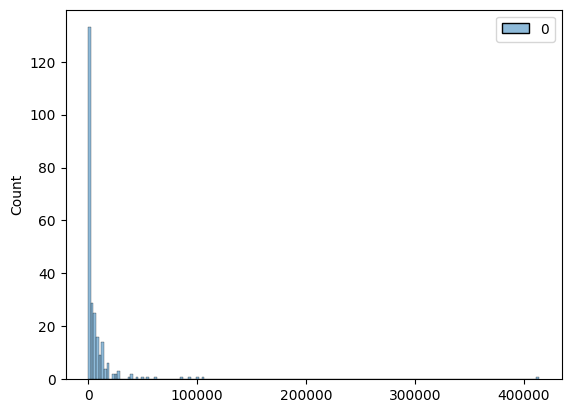

In [150]:
sub_y = model.predict(sub_pX)
sns.histplot(sub_y)

In [164]:
sub = pd.DataFrame(
    data = {
        'outlet_no' : np.array(sub_X.outlet_no.to_list())
        }
)
sub['total_sales_actual'] = sub_y.astype(np.int64)
sub

,outlet_no,total_sales_actual
0,1001,5718
1,1002,609
2,1003,9468
3,1004,358
4,1005,5379
...,...,...
250,1251,9148
251,1252,2451
252,1253,311
253,1254,257


In [166]:
sub.to_csv(os.path.join(base_dir, 'NYR.csv'),index=False)